#  Spam Email Detection uning Machine Learning

#### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Importing Dataset

In [2]:
#loading Data
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Internship\CipherByte Technoligies\Task-4\Spam Email Detection - spam.csv')

In [3]:
#view Data
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#view Shape of the dataset
data.shape

(5572, 5)

In [5]:
#checking if there is any null value in th dataset
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#dropping the columns contains only null values
data = data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
#view data after dropping unnecesary columns
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#view data
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
#checking if there is any duplicate value in th dataset
data.duplicated().sum()

409

In [10]:
#dropping duplicate values
data = data.drop_duplicates()

In [11]:
#rechecking duplicates 
data.duplicated().sum()

0

In [12]:
#current set of the clean dataset
data.shape

(5163, 2)

In [13]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5163 non-null   object
 1   v2      5163 non-null   object
dtypes: object(2)
memory usage: 121.0+ KB


In [14]:
#describing data
data.describe().T

,count,unique,top,freq
v1,5163,2,ham,4516
v2,5163,5163,"Go until jurong point, crazy.. Available only ...",1


#### Visualising data

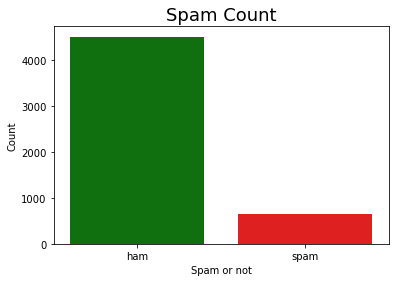

In [15]:
#distribution of Spam and Ham in the dataset
colours = ['green', 'red']
sns.countplot(data = data ,x = 'v1', palette=colours)
plt.xlabel("Spam or not")
plt.ylabel("Count")
plt.title("Spam Count", fontsize=(18))
plt.show()

#### Inference: 
The visual representation indicates that the dataset predominantly consists of non-spam emails, accounting for approximately 87% of the total.

#### Train-Test Split

In [16]:
#define x
x = data['v2']

In [17]:
y = data['v1']

In [18]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [19]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [20]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
#shape of train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4130,)
(1033,)
(4130,)
(1033,)


In [22]:
# Feature extraction using Count Vectorization
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [23]:
x_train_vectorized

<4130x7656 sparse matrix of type '<class 'numpy.int64'>'
	with 54317 stored elements in Compressed Sparse Row format>

In [24]:
x_test_vectorized

<1033x7656 sparse matrix of type '<class 'numpy.int64'>'
	with 12361 stored elements in Compressed Sparse Row format>

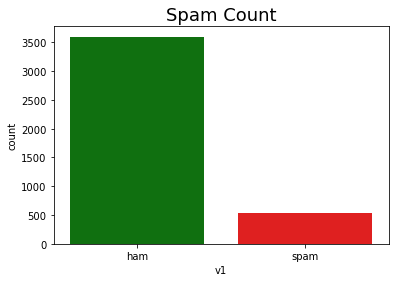

In [25]:
#check balance of target value
sns.countplot(x = y_train, palette= colours)
plt.title("Spam Count", fontsize=(18))
plt.show()

#### Balance the Data
The dataset appears to be imbalanced, suggesting the need to address this imbalance using the over-sampling method to achieve a balanced distribution.

In [26]:
#importing library
from imblearn.over_sampling import RandomOverSampler

# defining and fitting data
ros = RandomOverSampler(random_state = 0)
x_train1, y_train1 = ros.fit_resample(x_train_vectorized,y_train)

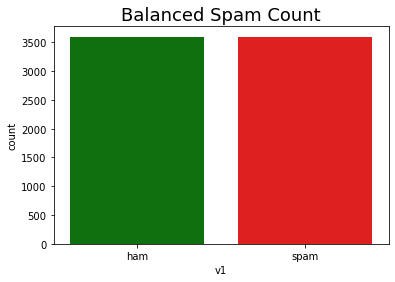

In [27]:
#plotting balanced datset
sns.countplot(x = y_train1, palette= colours)
plt.title("Balanced Spam Count", fontsize= (18))
plt.show()

The dataset has been balanced using the over-sampling method.

### Building Model to predict

#### Classification Using Naive Bayes Classifier

In [28]:
# Build and train the model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train1, y_train1)

MultinomialNB()

In [29]:
# Predict on test data
y_pred_nb = naive_bayes_model.predict(x_test_vectorized)

In [30]:
# Evaluate the model
print(f'Confusio Matrix:\n {confusion_matrix(y_test, y_pred_nb)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_nb)}')
print(f'Accuracy Score: {accuracy_score(y_pred_nb,y_test)}')

Confusio Matrix:
 [[897  20]
 [ 14 102]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       917
        spam       0.84      0.88      0.86       116

    accuracy                           0.97      1033
   macro avg       0.91      0.93      0.92      1033
weighted avg       0.97      0.97      0.97      1033

Accuracy Score: 0.9670861568247822


#### Clasification using Logistic Regression

In [31]:
# Build and train the model
lr_model = LogisticRegression()
lr_model.fit(x_train1, y_train1)

LogisticRegression()

In [32]:
# Predict on test data
y_pred_lr = lr_model.predict(x_test_vectorized)

In [33]:
# Evaluate the model
print(f'Confusio Matrix:\n {confusion_matrix(y_test, y_pred_lr)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_lr)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_lr)}')

Confusio Matrix:
 [[913   4]
 [ 13 103]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       917
        spam       0.96      0.89      0.92       116

    accuracy                           0.98      1033
   macro avg       0.97      0.94      0.96      1033
weighted avg       0.98      0.98      0.98      1033

Accuracy Score: 0.9835430784123911


#### Clasification using Support Vector Classifier

In [34]:
# Build and train the model
svc_model = SVC()
svc_model.fit(x_train1, y_train1)

SVC()

In [35]:
# Predict on test data
y_pred_svc = svc_model.predict(x_test_vectorized)

In [36]:
# Evaluate the model
print(f'Confusio Matrix:\n {confusion_matrix(y_test, y_pred_svc)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_svc)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_svc)}')

Confusio Matrix:
 [[916   1]
 [ 18  98]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       917
        spam       0.99      0.84      0.91       116

    accuracy                           0.98      1033
   macro avg       0.99      0.92      0.95      1033
weighted avg       0.98      0.98      0.98      1033

Accuracy Score: 0.9816069699903195


#### Clasification using Random Forest Classifier

In [37]:
# Build and train the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train1, y_train1)

RandomForestClassifier()

In [38]:
# Predict on test data
y_pred_rf = rf_model.predict(x_test_vectorized)

In [39]:
# Evaluate the model
print(f'Confusio Matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_rf)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf)}')

Confusio Matrix:
 [[917   0]
 [ 24  92]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       917
        spam       1.00      0.79      0.88       116

    accuracy                           0.98      1033
   macro avg       0.99      0.90      0.94      1033
weighted avg       0.98      0.98      0.98      1033

Accuracy Score: 0.9767666989351403


#### Clasification using Decision Tree Classifier

In [40]:
# Build and train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [41]:
# Predict on test data
y_pred_dt = dt_model.predict(x_test_vectorized)

In [42]:
# Evaluate the model
print(f'Confusio Matrix:\n {confusion_matrix(y_test, y_pred_dt)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_dt)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_dt)}')

Confusio Matrix:
 [[887  30]
 [ 26  90]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.97      0.97       917
        spam       0.75      0.78      0.76       116

    accuracy                           0.95      1033
   macro avg       0.86      0.87      0.87      1033
weighted avg       0.95      0.95      0.95      1033

Accuracy Score: 0.9457889641819942


#### Printing Result of all Models

In [43]:
#makig lists of model names and accuracy scores
model_names = ['Multinomial Naive Bayes Classifier', 'Logistic Regression Classifier', 'Support Vector Classifier',
              'Random Forest Classifier', 'Decission Tree Classifier']
accuracy_scores = [accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_svc),
                  accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_dt)]

#storing result into dataframe
result = pd.DataFrame({'Model': model_names,
                      'Accuracy': accuracy_scores})

#View Result
result

,Model,Accuracy
0,Multinomial Naive Bayes Classifier,0.967086
1,Logistic Regression Classifier,0.983543
2,Support Vector Classifier,0.981607
3,Random Forest Classifier,0.976767
4,Decission Tree Classifier,0.945789


#### Inference:
After evaluating various classifiers, it's evident that the Logistic Regression Classifier achieves the highest accuracy of 98.35%, closely followed by the Support Vector Classifier with an accuracy of 98.16%. The Random Forest Classifier and Multinomial Naive Bayes Classifier also exhibit strong performance, achieving accuracies of 97.68% and 96.71% respectively. The Decision Tree Classifier shows a respectable accuracy of 94.39%. These results highlight the effectiveness of these models in accurately predicting the dataset's classes.

#### Defining a Function to Check Spam

In [44]:
#Defining a function to check the mail is spam or not
def checkingSpam(message):
    transform_message = vectorizer.transform(message)
    prediction = lr_model.predict(transform_message)
    if prediction[0]== 'spam':
        print("This is a Spam Mail")
    else:
        print("This mail is non-Spam")

In [45]:
sample1 = ["Congratulations! You've won a free vacation to an exotic island. Click the link below to claim your prize now!"]

In [46]:
#checking result
checkingSpam(sample1)

This is a Spam Mail


In [47]:
sample2 = ['''Hello Sayanti,

I hope this email finds you well. Just wanted to check in and see how you're doing. 
We're planning a team meeting next week to discuss our upcoming project. 
Please let me know your availability.
Looking forward to hearing from you.

Best regards,
Team XYZ''']

In [48]:
#checking Result
checkingSpam(sample2)

This mail is non-Spam
